c:\users\karol\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\karol\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\karol\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\karol\appd

importing Jupyter notebook from machine.ipynb
(440,) 440 440
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Przed skalowaniem:
Max: 9.0907981879186
Min: -1.0993265850531095

Po skalowaniu:
Max: 1.0000000000000018
Min: 0.0
GETTING DATA


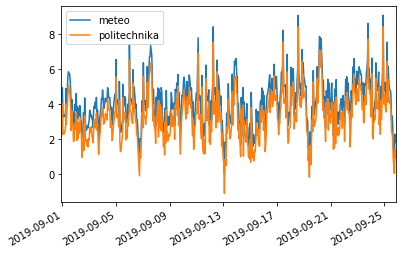

In [1]:
%matplotlib inline
import import_ipynb

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.externals import joblib
from sklearn.model_selection import TimeSeriesSplit


Sequential = tf.keras.models.Sequential
LSTM = tf.keras.layers.LSTM
Flatten = tf.keras.layers.Flatten
Dense = tf.keras.layers.Dense
Model = tf.keras.Model

from machine import (
    get_train_test_data,
    get_graph,
    get_df,
    out_scaler,
    in_scaler,
)

In [2]:
import itertools
import collections
def consume(iterator, n=None):
    "Advance the iterator n-steps ahead. If n is None, consume entirely."
    # Use functions that consume iterators at C speed.
    if n is None:
        # feed the entire iterator into a zero-length deque
        collections.deque(iterator, maxlen=0)
    else:
        # advance to the empty slice starting at position n
        next(islice(iterator, n, n), None)


X = []
y = []
for nX, ny, in get_train_test_data():
    nX = np.array(nX).reshape(nX.shape[0], 1)
    X.append(np.array(nX))
    y.append(np.array(ny))

X = np.array(X)
y = np.array(y)



print(X.shape)
print(X[:1], "...")


print(y.shape)
print(y[:3], '...')





In [4]:
# https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib
from itertools import islice
# 
# _X_train, _y_train, _, _ = list(*islice(get_train_test_data(), 1))
# pr
# meteo = np.copy(_X_train)[24][1]
# politechnika = np.copy(_X_train)[24][0]
# 
# x_axis = np.arange(0,meteo.shape[0])
# a_max =  np.amax(_X_train[0])
# a_min = np.amin(_X_train[0])
# 
# fill = meteo.copy()
# fill[:-24] = np.nan
# 
# 
# fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
# ax[0].axis([0,len(x_axis), a_min, a_max])
# ax[1].axis([0,len(x_axis), a_min, a_max])
# ax[0].set_title('Meteo')
# ax[1].set_title('Politechnika')
# 
# 
# 
# ax[0].plot(x_axis,meteo, color="blue")
# ax[0].plot(x_axis,fill, color="red")
# 
# ax[1].plot(x_axis,politechnika, color="blue")
# plt.show()

In [5]:
n_features = 2



In [6]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(168, 2)))
model.add(Flatten())
model.add(Dense(1))


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

W0929 18:14:39.944675 11716 deprecation.py:506] From c:\users\karol\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10600     
_________________________________________________________________
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


In [8]:
from time import sleep
i = 0
for X_train, y_train, X_test, y_test in get_train_test_data():

    org_X_test = X_test

    i += 1
    X_train = X_train.reshape(X_train.shape[0], 168, 2)
    X_test = X_test.reshape(X_test.shape[0], 168, 2)
    print('--'*10)
    
    
    
    model.fit(X_train, y_train, epochs=20, verbose=0)

    yhat = model.predict(X_test, verbose=0)
    # y_test = y_test.reshape(2)
    print("Test nr.", i)
    print("   SCORE:", model.evaluate(X_test, y_test))
    print('EXPECTED:', out_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten())
    print('EXPECTED:', y_test.flatten())
    print('     GOT:', out_scaler.inverse_transform(yhat.reshape(-1, 1)).flatten())
    print('     GOT:', yhat.flatten())

    # 
    # plt.plot(np.append(x_axis, 169), np.append(org_X_test[0][0], y_test), color='blue')
    # plt.plot(np.append(x_axis, 169), np.append(org_X_test[0][0], np.array(yhat)), color='red')
    # plt.plot(x_axis, org_X_test[0][0], color='black')
    # 
    # plt.show()

W0929 18:14:40.217732 11716 deprecation.py:323] From c:\users\karol\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


GETTING DATA
--------------------
Test nr. 1
2/2 [==============================] - 0s 32ms/sample - loss: 0.0408
   SCORE: 0.04084113985300064
EXPECTED: [2.28301657 1.87358762]
EXPECTED: [0.35515914 0.31216751]
     GOT: [3.3157663 4.391861 ]
     GOT: [0.46360186 0.57659596]
--------------------
Test nr. 2
2/2 [==============================] - 0s 4ms/sample - loss: 0.0200
   SCORE: 0.019959978759288788
EXPECTED: [2.06750267 2.29855343]
EXPECTED: [0.33252934 0.35679057]
     GOT: [3.121209  3.8829453]
     GOT: [0.44317257 0.52315784]
--------------------
Test nr. 3
2/2 [==============================] - 0s 4ms/sample - loss: 0.0085
   SCORE: 0.008489533327519894
EXPECTED: [2.16257637 2.4214081 ]
EXPECTED: [0.34251245 0.36969078]
     GOT: [2.6430008 3.5655806]
     GOT: [0.39295888 0.48983333]
--------------------
Test nr. 4
2/2 [==============================] - 0s 4ms/sample - loss: 0.0215
   SCORE: 0.021517444401979446
EXPECTED: [2.77133535 3.66391249]
EXPECTED: [0.4064345  0.500

GETTING DATA
(218,)
(218,)
****************************************
****************************************
****************************************
****************************************
****************************************


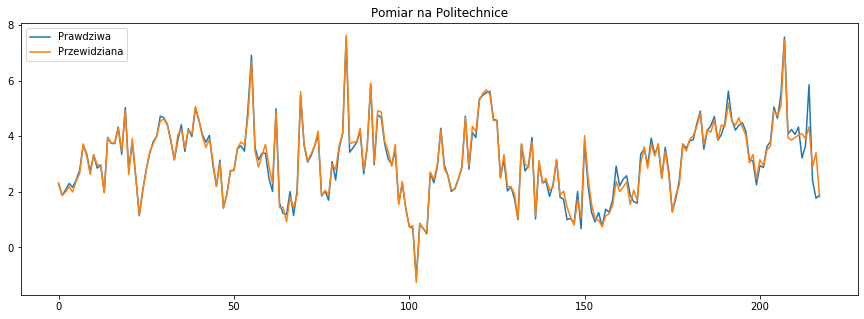

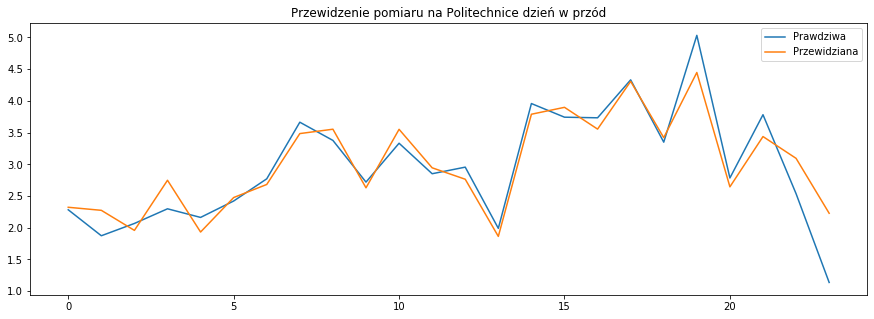

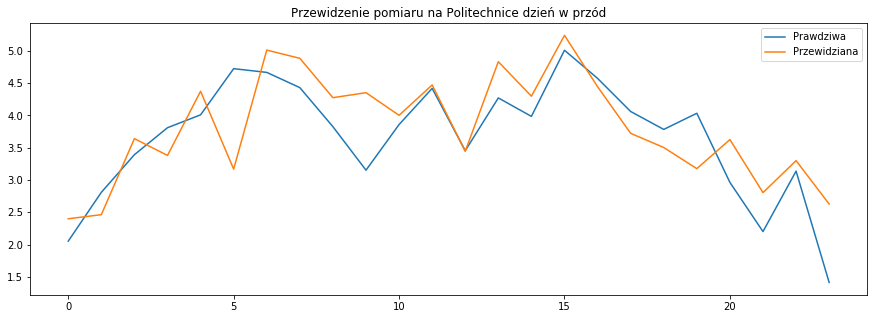

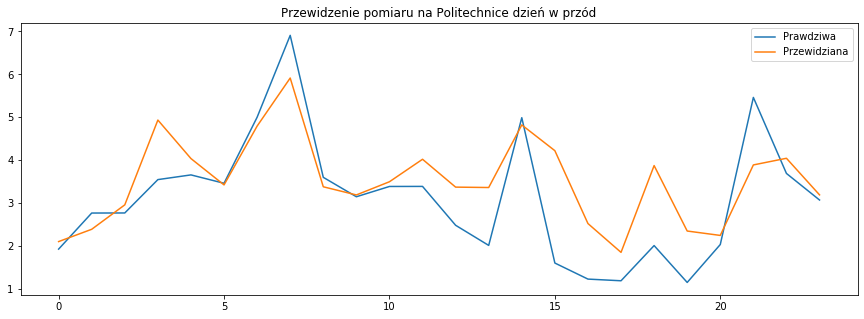

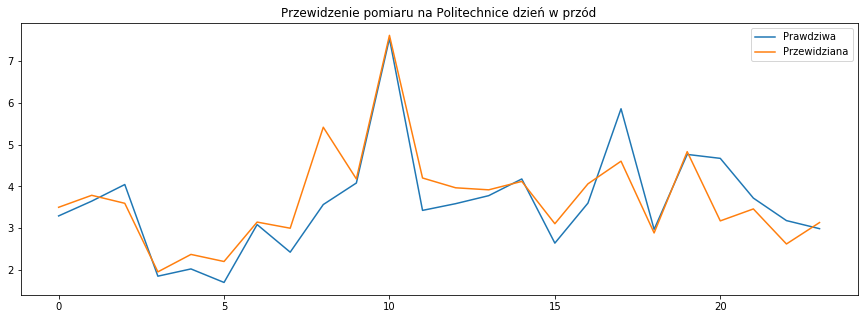

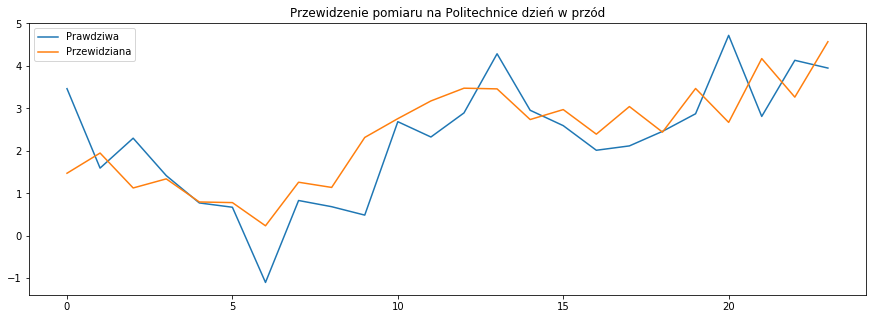

In [9]:
X_test_day = []
y_test_day = []


actual = []
pred = []
for _X_train, _y_train, X_test, y_test in get_train_test_data():
    X_test_day.append(X_test)
    y_test_day.append(y_test)
    X_test = X_test.reshape(X_test.shape[0], 168, 2)
    y_pred = model.predict(X_test)
    actual.append(y_test)
    pred.append(y_pred)

actual = out_scaler.inverse_transform(np.array(actual).flatten().reshape(-1,1)).flatten()
pred = out_scaler.inverse_transform(np.array(pred).flatten().reshape(-1,1)).flatten()

print(pred.shape)
print(actual.shape)
plt.figure(figsize=(15,5))
plt.title("Pomiar na Politechnice")
plt.plot(actual)
plt.plot(pred)
plt.legend("Prawdziwa Przewidziana".split())
plt.show()


star_day = X_test_day[0][0][0]

X_test_day = np.array(X_test_day)
X_test_day = X_test_day.reshape(X_test_day.shape[0]*2,2,168)
y_test_day = np.array(y_test_day).flatten()
for i in range(0, 5):
    
    pred = []
    actual = []
    
    for j in range(0, 24):
        input = []
        
        meteo = np.array(X_test_day)[i*24+j, 1]
        
        a1 = np.append(star_day[len(pred):], np.array(pred))
        input.append([a1 , meteo])
        x = np.array(input).reshape(1, 168, 2)
        pred.append(out_scaler.inverse_transform(model.predict(x).flatten().reshape(-1,1)).flatten())
        actual.append(out_scaler.inverse_transform(y_test_day[i*24+j].flatten().reshape(-1,1)).flatten())

    
    print('****'*10)
    plt.figure(figsize=(15,5))
    plt.title("Przewidzenie pomiaru na Politechnice dzień w przód")
    plt.plot(np.array(actual).flatten())
    plt.plot(np.array(pred).flatten())
    plt.legend("Prawdziwa Przewidziana".split())
    plt.show()


In [10]:
model.save("model.h5")

In [11]:
model = tf.keras.models.load_model("model.h5")

W0929 18:24:41.021153 11716 deprecation.py:506] From c:\users\karol\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0929 18:24:41.022150 11716 deprecation.py:506] From c:\users\karol\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Orthogonal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0929 18:24:41.023147 11716 deprecation.py:506] From c:\users\karol\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling 

f, axarr = plt.subplots(nrows=3, ncols=2)
axarr = axarr.flatten()
x = 0
for rX, ry,a,n in get_train_test_data():
    if x%5 == 0:
        
        X, y = np.array(rX), np.array(ry)
        X_input = np.array(X).reshape(1, X.shape[0], 1)
        yhat = model.predict(X_input)
        axarr[x//5].plot([31], yhat,"b*")
        axarr[x//5].plot([31], y, "r*")
        axarr[x//5].plot(np.arange(30), X, "r")
    

        # print("Prediciton:", yhat, "Actual:",y)
    x+= 1
    if x == 30:
        break
plt.legend(['przewidziany', 'rzeczywisty'], loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)
plt.ylabel("Dzień")
plt.ylabel("Prędkość wiatru")